# Центральная предельная теорема

# Задание 
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Для своего домашнего задания я выбрал распределение Парето. Краткая справка доступна по ссылкам: https://ru.wikipedia.org/wiki/Распределение_Парето , https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

In [7]:
#параметры распределения
k = 4.0
xm = 3.0

#frozen distribution
distributionRv = sts.pareto(k, loc=0, scale=xm)

# сгенерируем 1000 значений
n = 1000
distributionSample = distributionRv.rvs(n)

#проверка задания распределения
print( 'Теоретическое среднее: ', round(distributionRv.mean(), 2))
print ('Теоретическое стандартное отклонение: ', round(distributionRv.std(), 2))

Теоретическое среднее:  4.0
Теоретическое стандартное отклонение:  1.41


Text(0, 0.5, 'pdf')

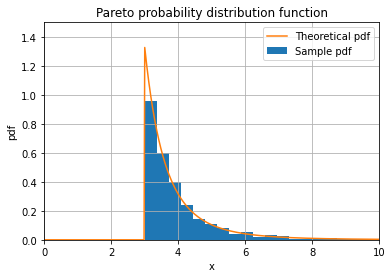

In [17]:
#гистограмма выборки
#в мое версии python при использовании normed вылетает ошибка,
#поэтому я исользовал density
plt.hist(distributionSample, bins=60, density=True, label='Sample pdf')

#теоретическая плотность распределения
x = np.linspace(0,20,1000)
pdf = distributionRv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

## Сгенерируем 1000 выборок размера n = 5, 10, 50. Затем построим истограммы распределений их выборочных средних. 

In [26]:
#количество выборок
sampleNum = 1000

#массив объёма выборок
sampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )

#вычисление выборочных средних значений и занесение в массив
for i in range(3):
    for j in range(sampleNum):
        distributionSampleTemp = np.array( sts.pareto.rvs(k, loc=0, scale=xm, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print (distributionSamples)

[[3.89624193 3.4316572  5.09993936 ... 4.14906019 3.97143818 3.92565856]
 [4.44863312 3.96481544 4.37510231 ... 3.63034905 3.88560767 3.52362837]
 [4.04442473 4.17591292 3.74330622 ... 4.14443041 3.82250173 4.01400807]]


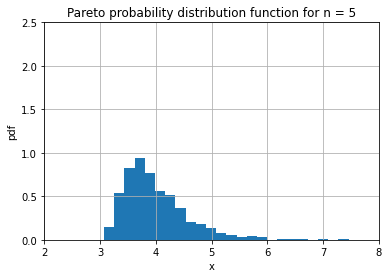

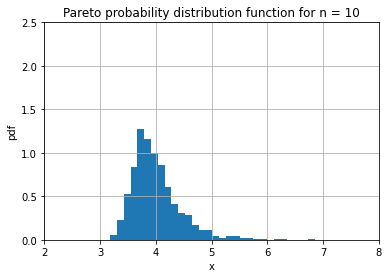

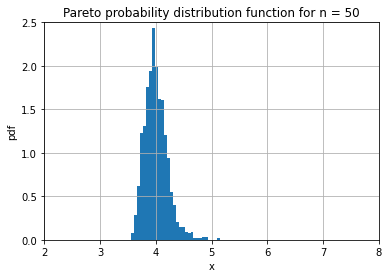

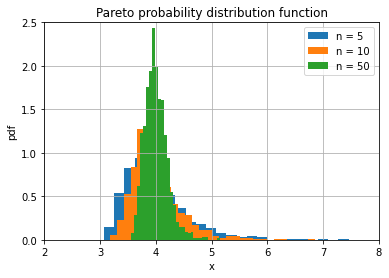

In [29]:
#гистограммы выборки
for i in range(3):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range(3):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

## Вычисление параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

In [32]:
#Математическое ожидание и дисперсия

distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros(3)
for i in range(3):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / sampleVolume[i]
    
print('Математическое ожидание: ' + str(distributionSampleMean))
for i in range(3):
    print ('Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


## Нарисовать плотность соответствующего нормального распределения поверх каждой гистограммы

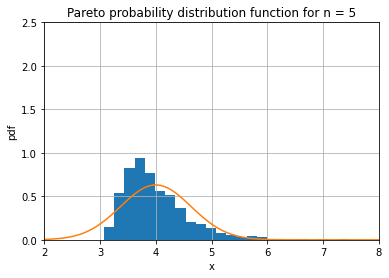

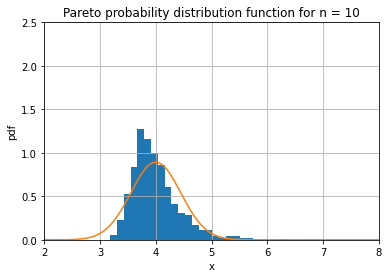

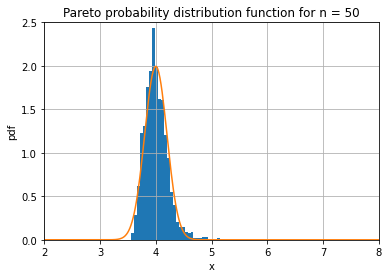

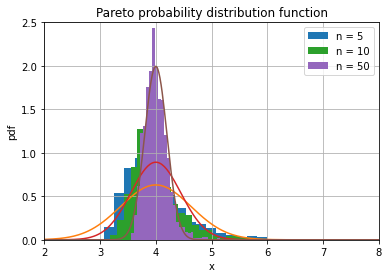

In [34]:
#гистограммы выборки
for i in range(3):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range(3):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

# Выводы по результатам задания
Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы.
С ростом n точность нормальной аппроксимации увеличивается.